<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [2]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.0 Variable Identification

In [3]:
diamonds.dtypes

,0
carat,float64
cut,category
color,category
clarity,category
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:

sns.countplot(x="cut", data=diamonds)
plt.title("Count of Diamonds by Cut")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()



## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [ ]:
diamonds.describe()

In [42]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


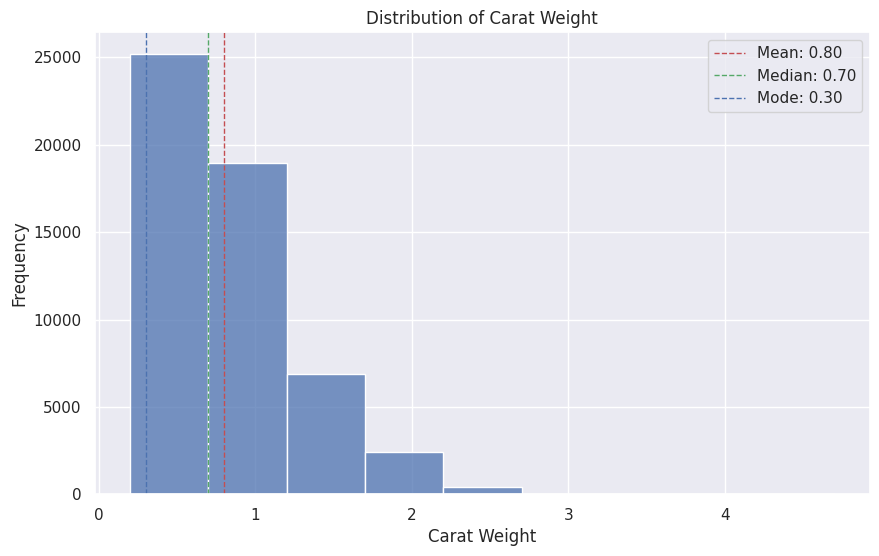

Mean of Carat: 0.80
Median of Carat: 0.70
Mode of Carat: 0.30


In [52]:

# Calculate mean, median, and mode for 'carat'
carat_mean = diamonds['carat'].mean()
carat_median = diamonds['carat'].median()
carat_mode = diamonds['carat'].mode()[0]  # Access the first mode value

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['carat'], bins=np.arange(0.2, 5.2, 0.5), kde=False)  # Using sns.histplot for histogram. weight of the diamond (0.2--5.01) thus we used 0.5 for bin size
plt.title('Distribution of Carat Weight')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')

# Display mean, median, and mode on the plot
plt.axvline(carat_mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {carat_mean:.2f}')
plt.axvline(carat_median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {carat_median:.2f}')
plt.axvline(carat_mode, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {carat_mode:.2f}')

plt.legend()
plt.show()

print(f"Mean of Carat: {carat_mean:.2f}")
print(f"Median of Carat: {carat_median:.2f}")
print(f"Mode of Carat: {carat_mode:.2f}")

We can see that mean is to the right of median and mode. mode or the peek of our distribution is 0.3 which means it is the most occured value or dimonds with a carat of 0.3. we can Also see the the median is less the the mean which means that ouliers exist to the right of the mean and the distribution is right skewed. In order to identify the outliers let's use a box plot.

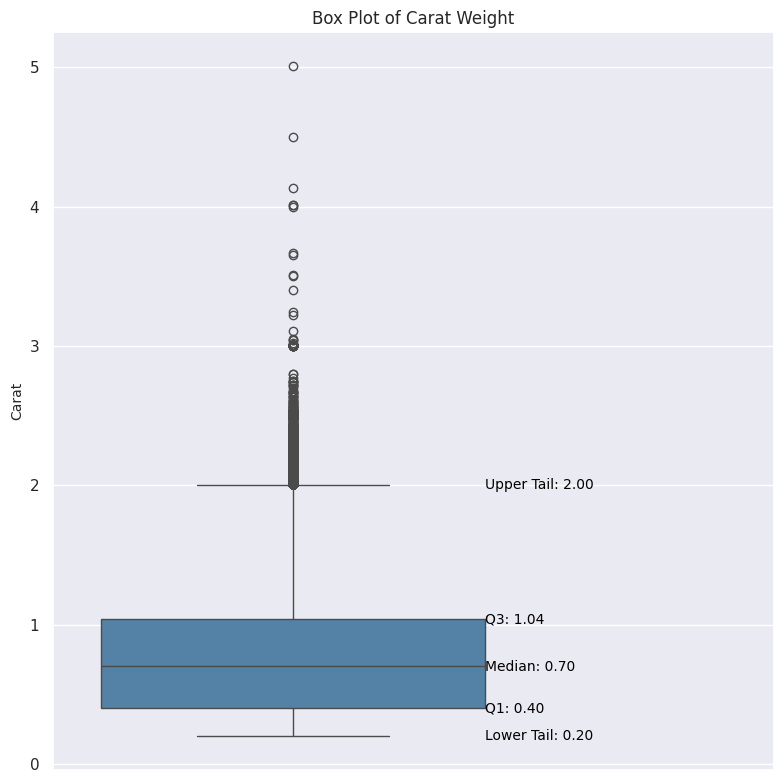

In [7]:
# Calculate mean, median, and mode for 'carat'
carat_mean = diamonds['carat'].mean()
carat_median = diamonds['carat'].median()
carat_mode = diamonds['carat'].mode()[0]  # Access the first mode value


# Create the box plot
plt.figure(figsize=(8, 8))
sns.boxplot(y=diamonds['carat'], color='steelblue')
plt.title('Box Plot of Carat Weight', fontsize=12)
plt.ylabel('Carat', fontsize=10)

# Calculate quartile values and median
Q1 = diamonds['carat'].quantile(0.25)
Q3 = diamonds['carat'].quantile(0.75)
median = diamonds['carat'].median()
IQR = Q3 - Q1

# Calculate whisker positions (actual lower/upper whisker positions)
lower_whisker = diamonds['carat'][diamonds['carat'] >= Q1 - 1.5 * IQR].min()
upper_whisker = diamonds['carat'][diamonds['carat'] <= Q3 + 1.5 * IQR].max()

# Add annotations for median and quartiles
offset = 0.4  # Adjusts text position horizontally
plt.text(offset, Q1, f'Q1: {Q1:.2f}', va='center', ha='left', fontsize=10, color='black')
plt.text(offset, Q3, f'Q3: {Q3:.2f}', va='center', ha='left', fontsize=10, color='black')
plt.text(offset, median, f'Median: {median:.2f}', va='center', ha='left', fontsize=10, color='black')

# Add annotations for actual whisker positions
plt.text(offset, lower_whisker, f'Lower Tail: {lower_whisker:.2f}', va='center', ha='left', fontsize=10, color='black')
plt.text(offset, upper_whisker, f'Upper Tail: {upper_whisker:.2f}', va='center', ha='left', fontsize=10, color='black')

# Adjust x-axis limits for spacing
plt.xlim(-0.5, 1)

# Show plot
plt.tight_layout()
plt.show()

we can see that 50% of the data points lies within caret of 0.5 and 0.90  and both the quartiels are pretty evenly spred out also, the median is 0.70. now we can see that byoond 1.49 which is the upper tail alot of the outliers exists. Also we know that the mode is 0.30 which is less then Q1 thus verifying the skewness of the dataset.

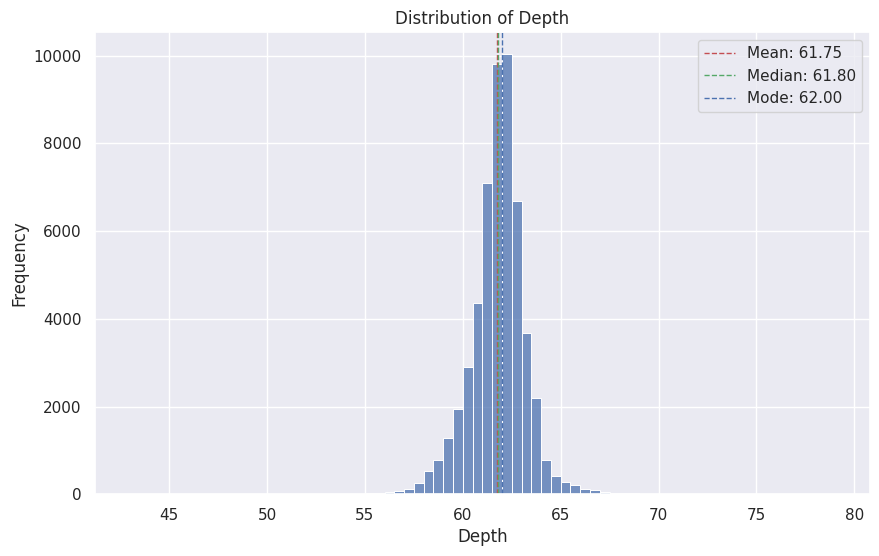

Mean of Depth: 61.75
Median of Depth: 61.80
Mode of Depth: 62.00


In [49]:

# Calculate mean, median, and mode for 'depth'
depth_mean = diamonds['depth'].mean()
depth_median = diamonds['depth'].median()
depth_mode = diamonds['depth'].mode()[0]  # Access the first mode value

# Create the histogram for 'depth'
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['depth'], bins=np.arange(diamonds['depth'].min(), diamonds['depth'].max() + 0.5, 0.5), kde=False) #let's keep the binsize to 0.5 to get better reading of distribution
plt.title('Distribution of Depth')
plt.xlabel('Depth')
plt.ylabel('Frequency')

# Display mean, median, and mode on the plot
plt.axvline(depth_mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {depth_mean:.2f}')
plt.axvline(depth_median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {depth_median:.2f}')
plt.axvline(depth_mode, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {depth_mode:.2f}')

plt.legend()
plt.show()

print(f"Mean of Depth: {depth_mean:.2f}")
print(f"Median of Depth: {depth_median:.2f}")
print(f"Mode of Depth: {depth_mode:.2f}")

we can see most of the data is at the centered and all of the central tendecies are pretty close thus depth uniformly distributed. (most things in nature are)

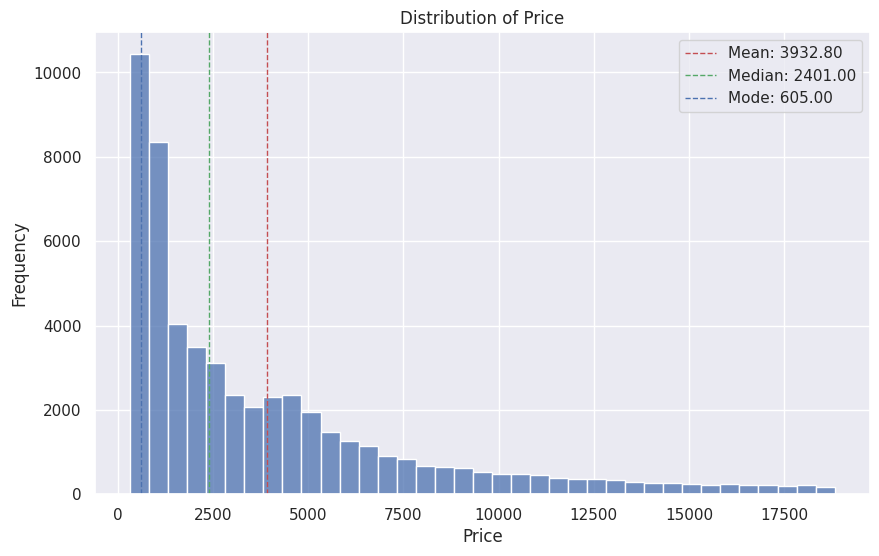

Mean of Price: 3932.80
Median of Price: 2401.00
Mode of Price: 605.00


In [53]:
# Calculate mean, median, and mode for 'price'
price_mean = diamonds['price'].mean()
price_median = diamonds['price'].median()
price_mode = diamonds['price'].mode()[0]  # Access the first mode value

# Create the histogram for 'price'
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['price'], bins=np.arange(diamonds['price'].min(), diamonds['price'].max() + 500, 500), kde=False)  # Bin size set to 500
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display mean, median, and mode on the plot
plt.axvline(price_mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {price_mean:.2f}')
plt.axvline(price_median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {price_median:.2f}')
plt.axvline(price_mode, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {price_mode:.2f}')

plt.legend()
plt.show()

print(f"Mean of Price: {price_mean:.2f}")
print(f"Median of Price: {price_median:.2f}")
print(f"Mode of Price: {price_mode:.2f}")

We can see that price is exponentially distributed which indicates as price get's higher dimonds get rare'r which makes sense

### 2.2 For categorical variables: frequency table, count plot

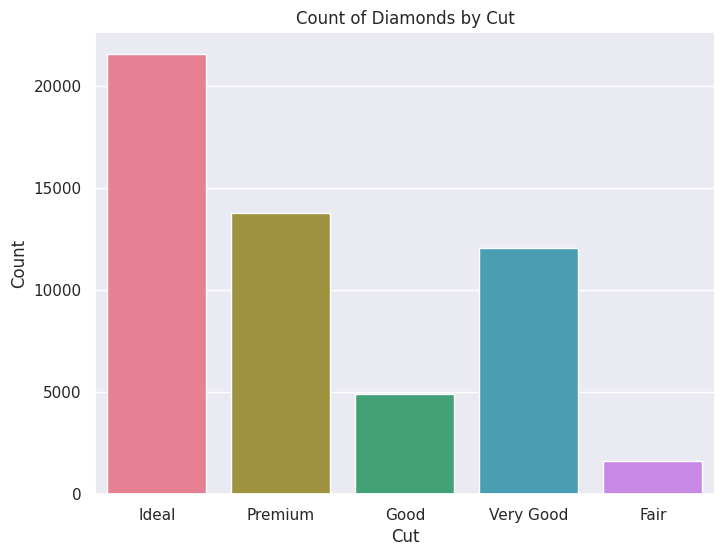

Statistics for Cut:
  Mode(peak of distribution or highest occurence): Ideal
--------------------


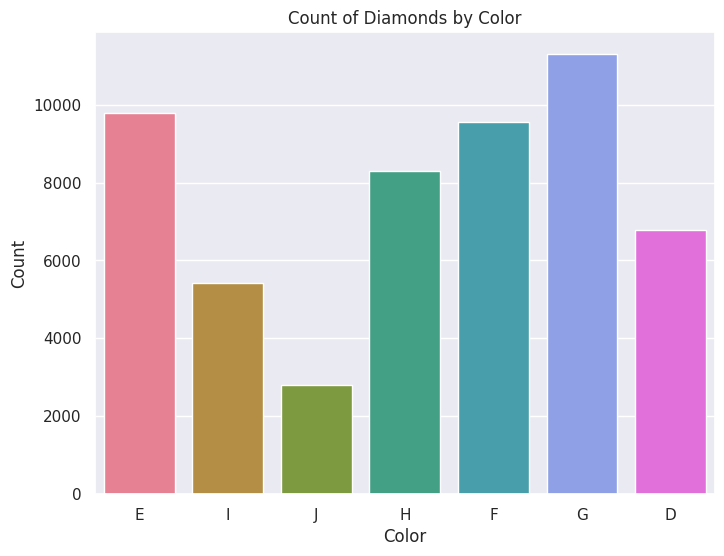

Statistics for Color:
  Mode(peak of distribution or highest occurence): G
--------------------


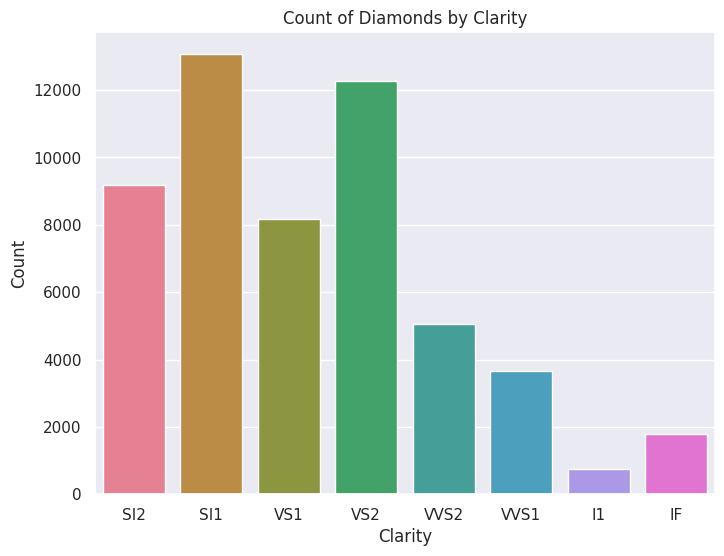

Statistics for Clarity:
  Mode(peak of distribution or highest occurence): SI1
--------------------


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert categorical columns to string type
for column in ['cut', 'color', 'clarity']:
    diamonds[column] = diamonds[column].astype(str)

# Function to create countplot and display mean, median, mode
def create_countplot_with_stats(column_name, title):
    colors = sns.color_palette("husl", len(diamonds[column_name].unique()))
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column_name, data=diamonds, palette=colors)
    plt.title(title)
    plt.xlabel(column_name.capitalize())
    plt.ylabel("Count")
    plt.show()


    print(f"Statistics for {column_name.capitalize()}:")
    # Mean, Median not applicable for categorical data
    # Mode is displayed
    mode = diamonds[column_name].mode()[0]
    print(f"  Mode(peak of distribution or highest occurence): {mode}")
    print("-" * 20)  # Separator

# Generate count plots and statistics
create_countplot_with_stats('cut', 'Count of Diamonds by Cut')
create_countplot_with_stats('color', 'Count of Diamonds by Color')
create_countplot_with_stats('clarity', 'Count of Diamonds by Clarity')

## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

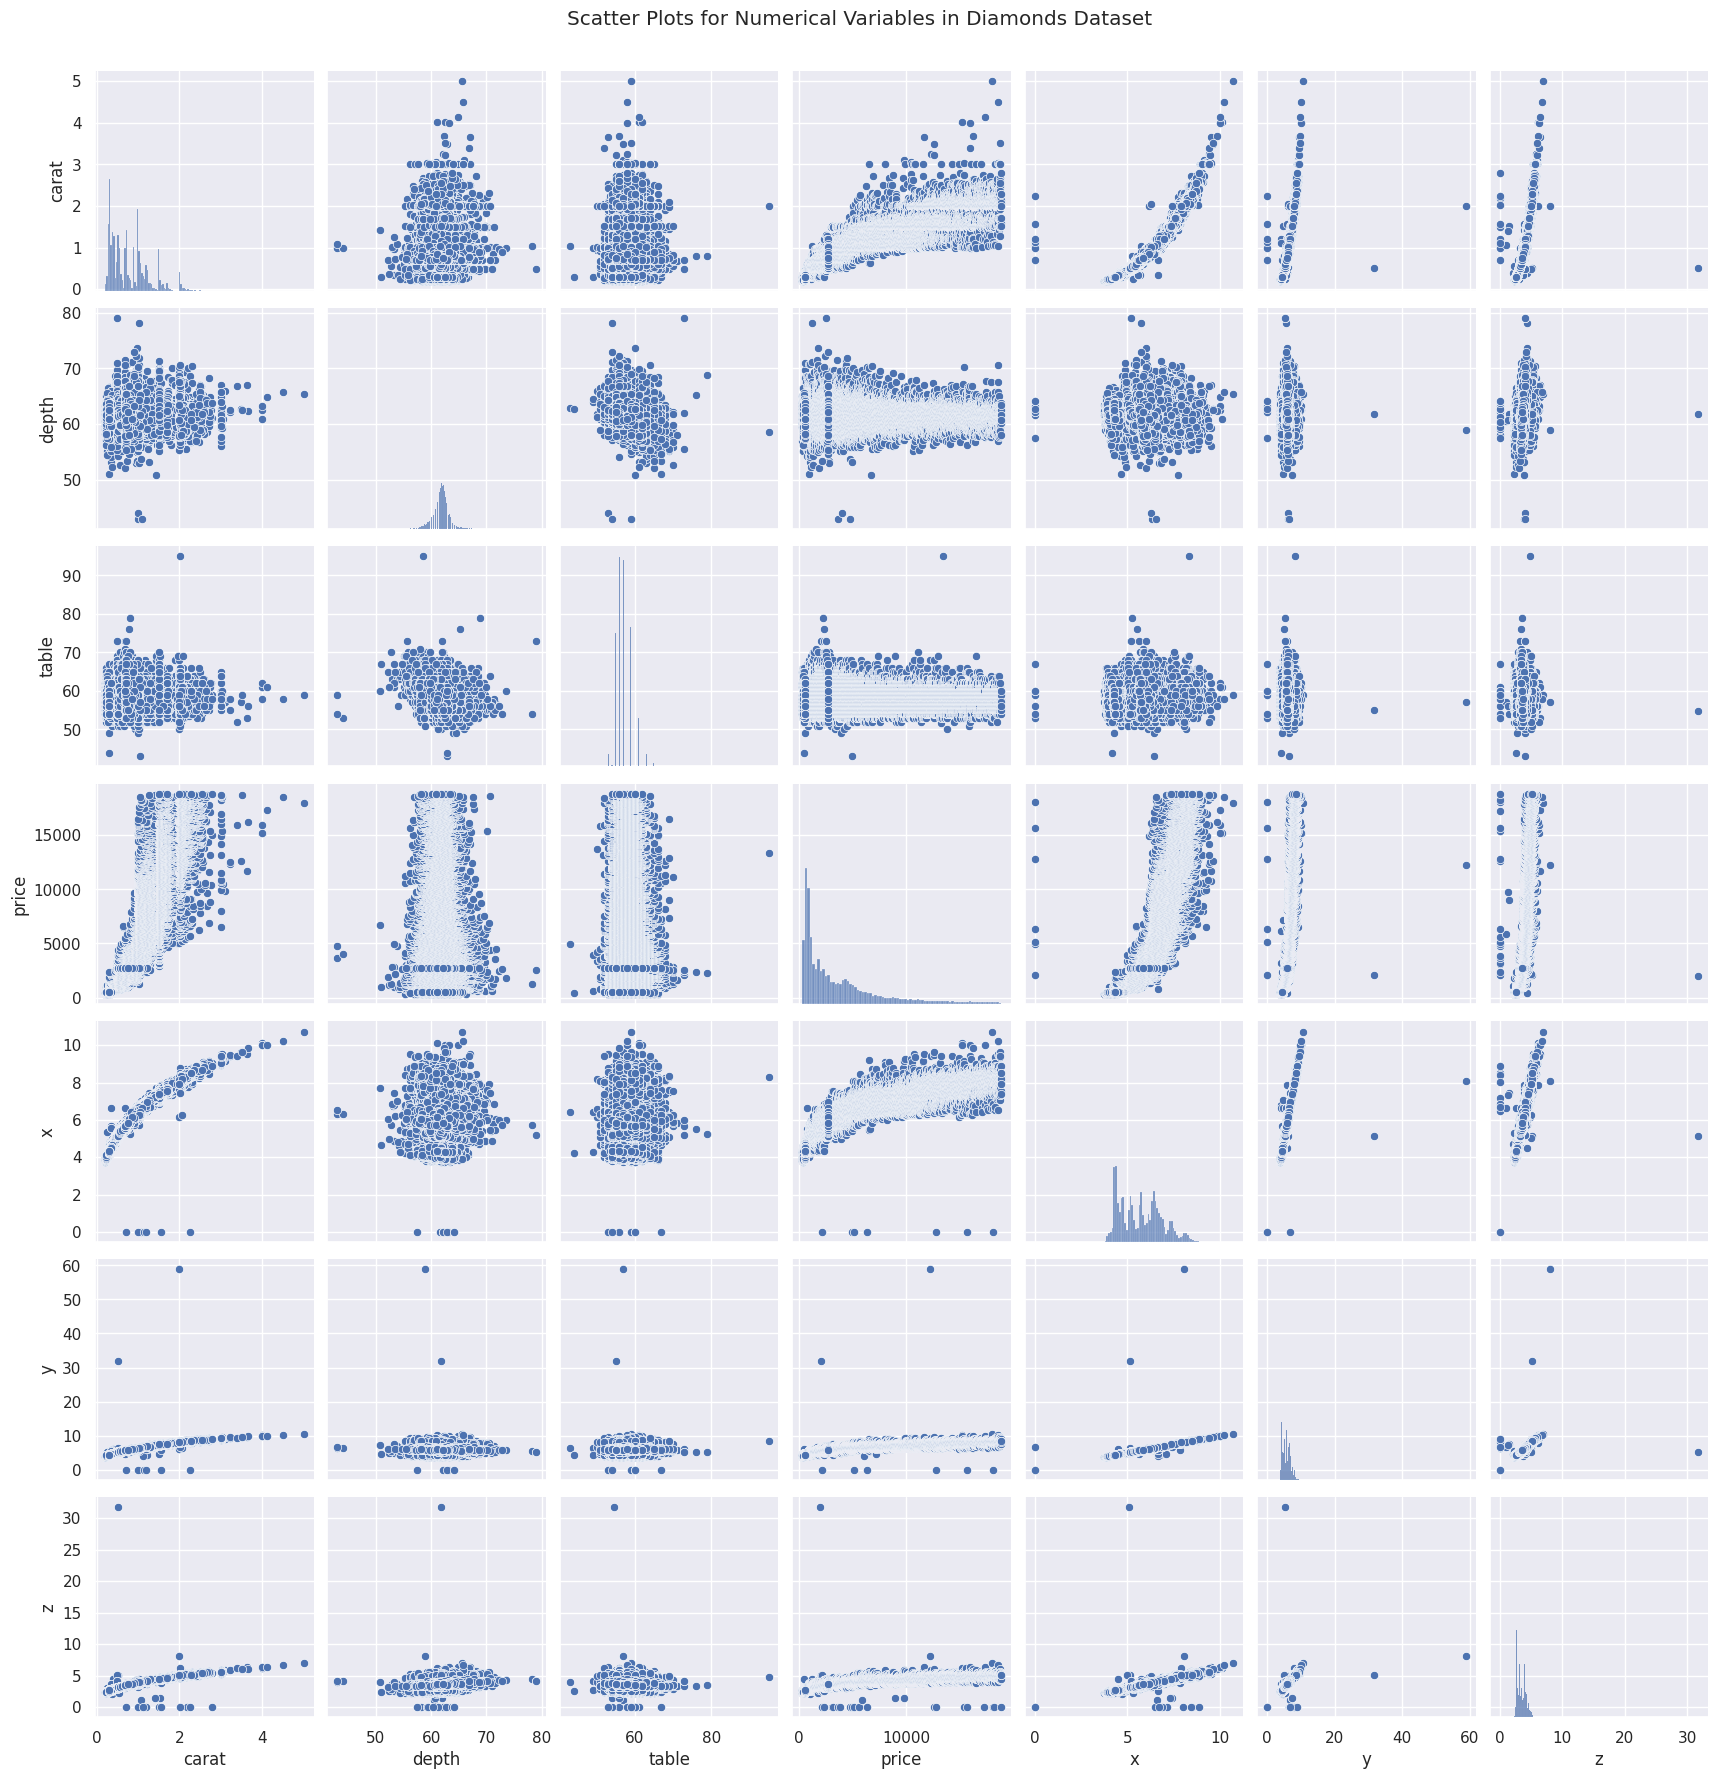

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for the pairplot
numerical_diamonds = diamonds.select_dtypes(include=np.number)

# Create the pairplot
sns.pairplot(numerical_diamonds)
plt.suptitle("Scatter Plots for Numerical Variables in Diamonds Dataset", y=1.02)  # Add title above the plots
plt.show()

we can see that crarat and (x,y,z) are positively correlated and (x,y,z) have positive corelation between themselves.Price also has positive correlation with (x,y,z) and all other have little to no correlation

### 3.2 Categorical & Categorical: stacked column chart

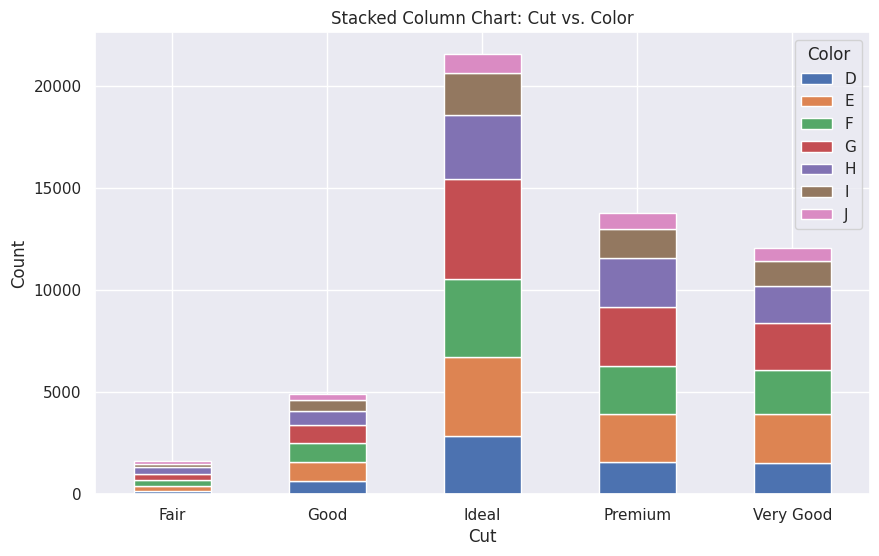

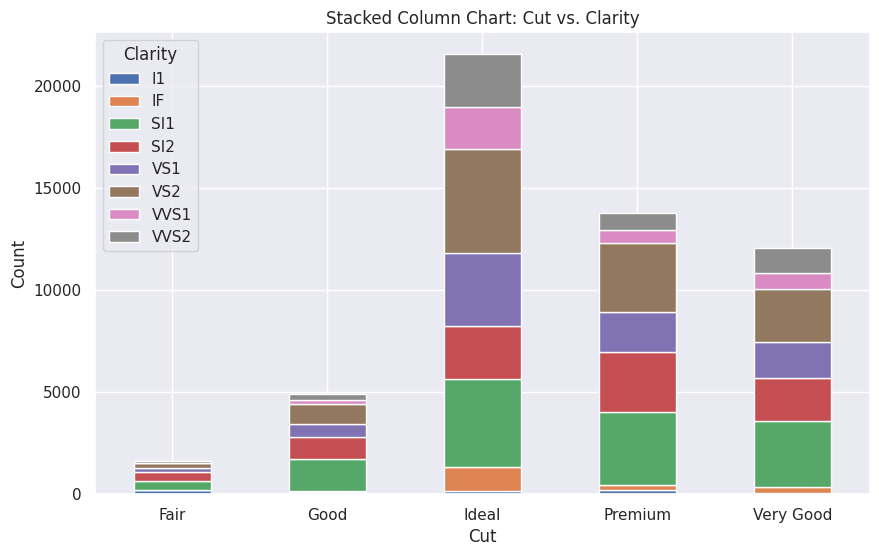

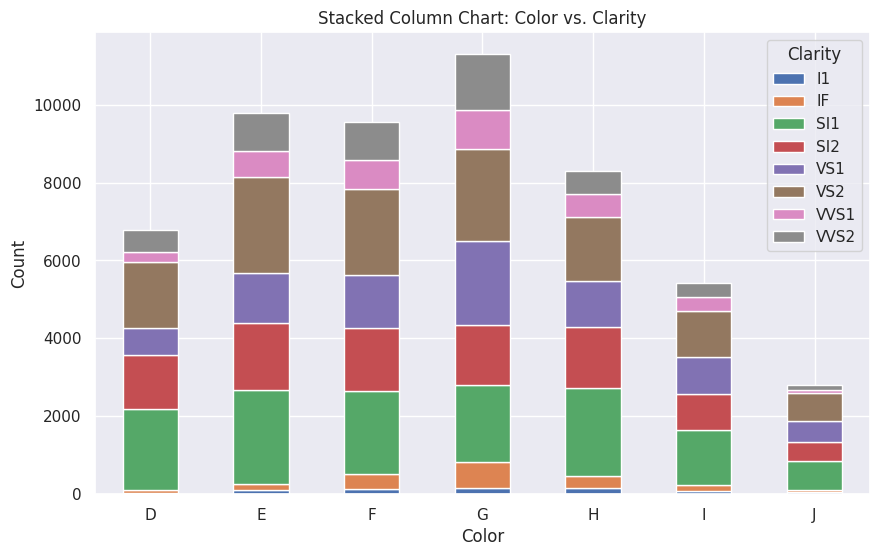

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of categorical columns
categorical_cols = ['cut', 'color', 'clarity']

# Iterate through all combinations of categorical variables
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]

        # Create a cross-tabulation (contingency table)
        ct = pd.crosstab(diamonds[col1], diamonds[col2])

        # Create the stacked column chart
        ct.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f"Stacked Column Chart: {col1.capitalize()} vs. {col2.capitalize()}")
        plt.xlabel(col1.capitalize())
        plt.ylabel("Count")
        plt.xticks(rotation=0)  # Prevent x-axis labels from overlapping
        plt.legend(title=col2.capitalize())
        plt.show()

### 3.3 Categorical & Continuous: boxplots

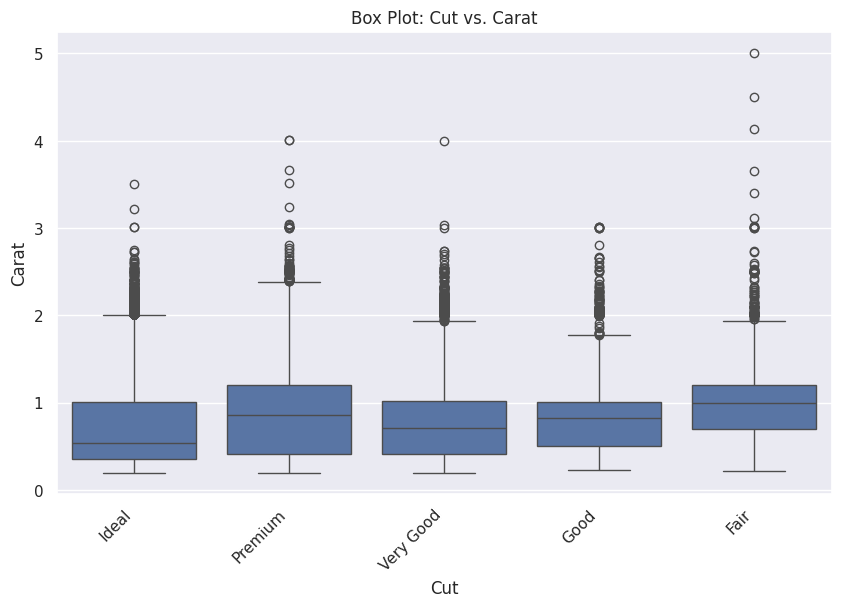

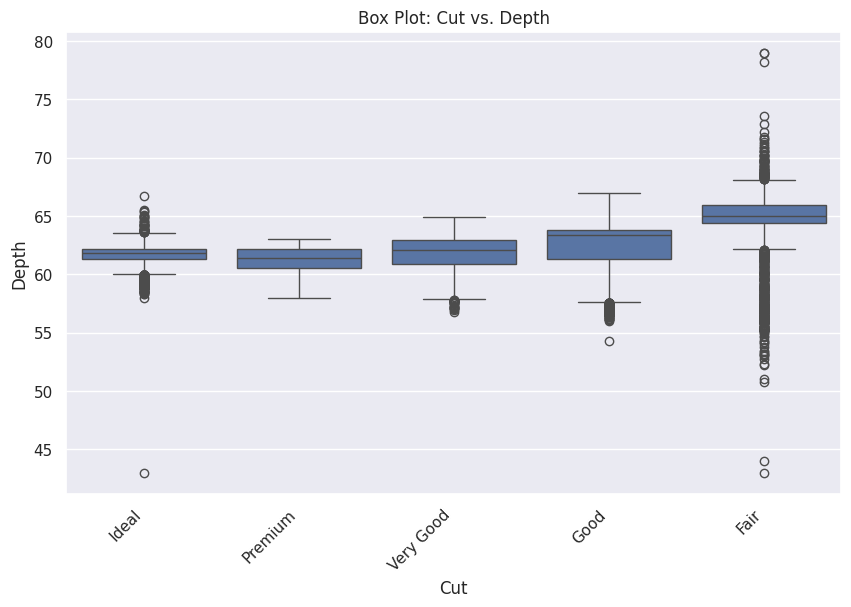

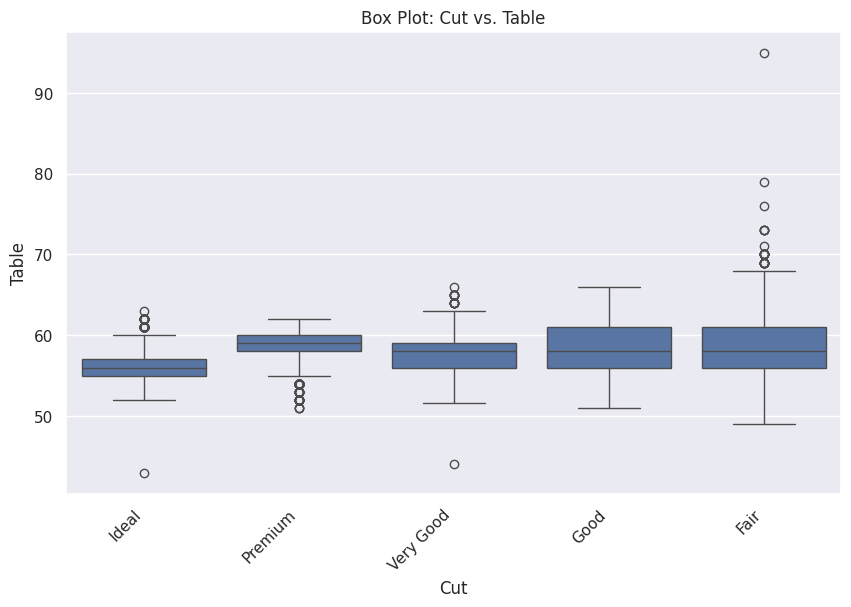

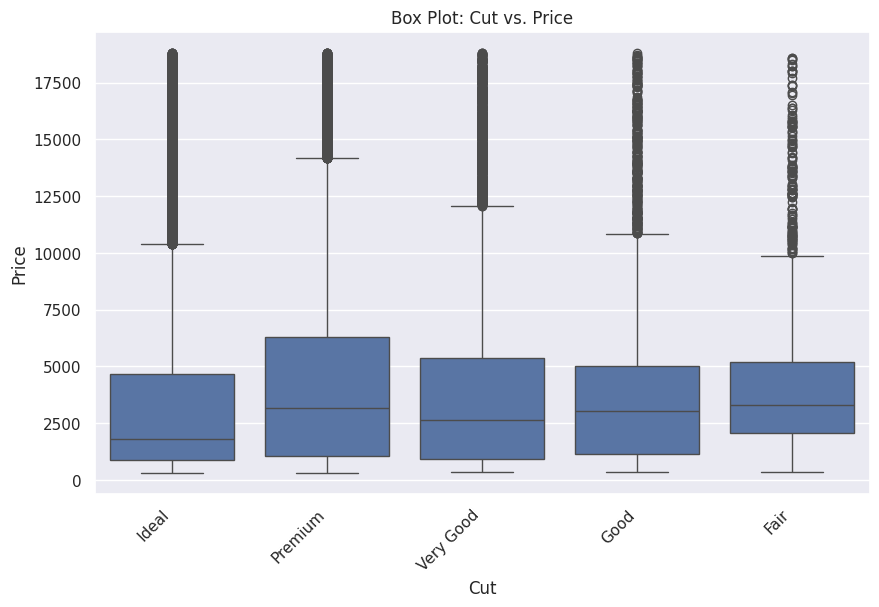

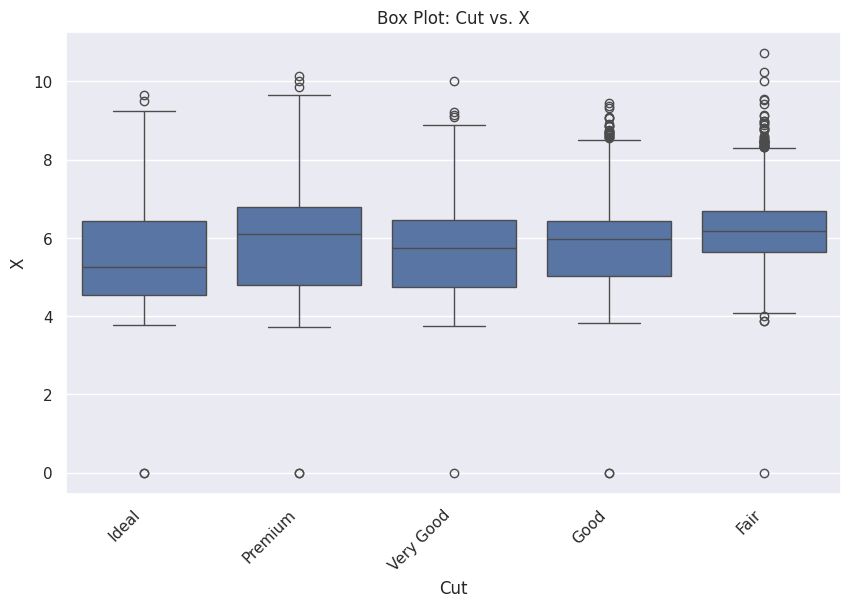

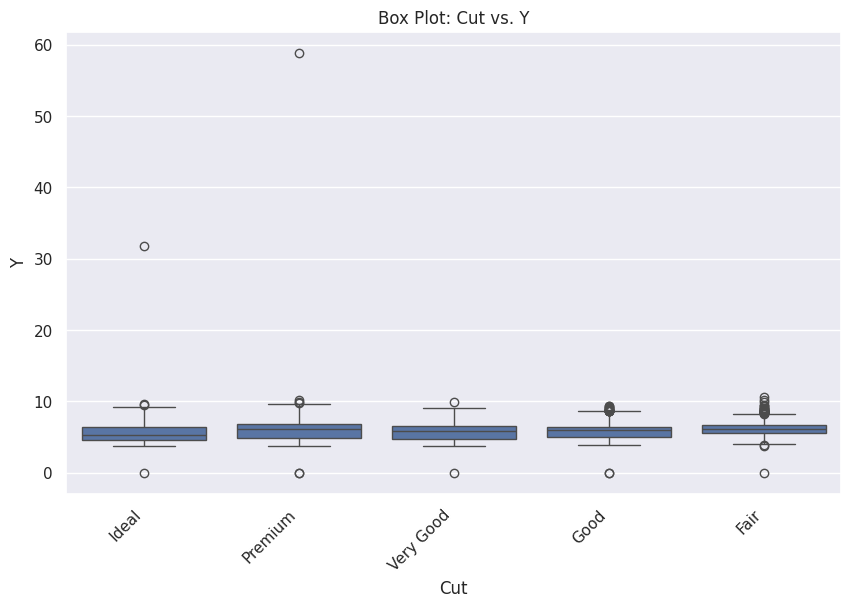

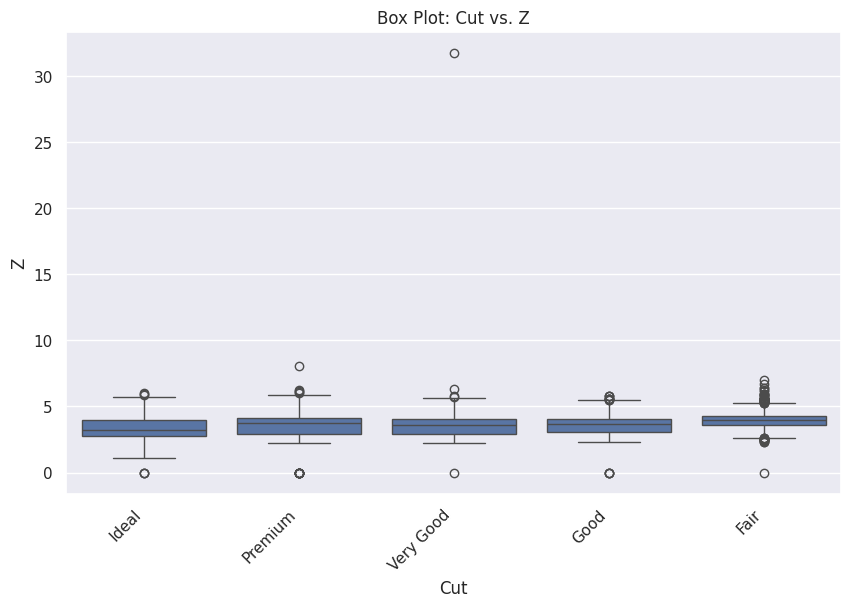

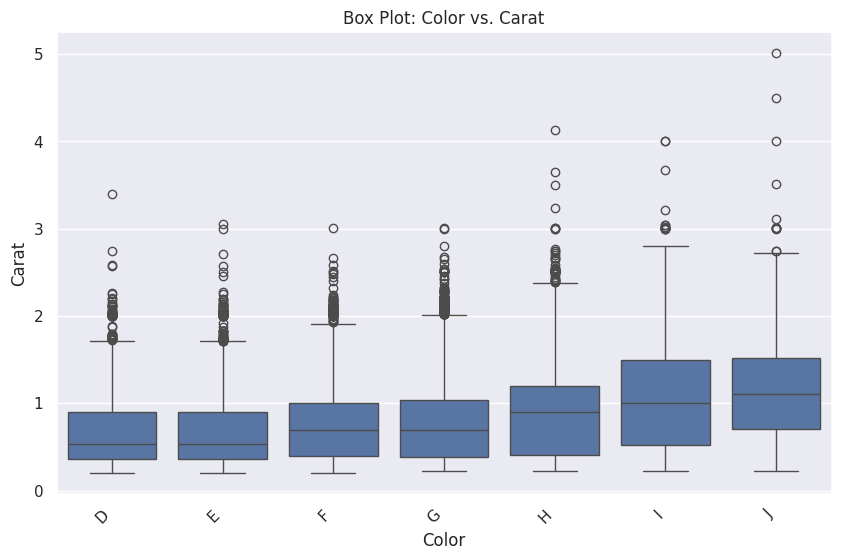

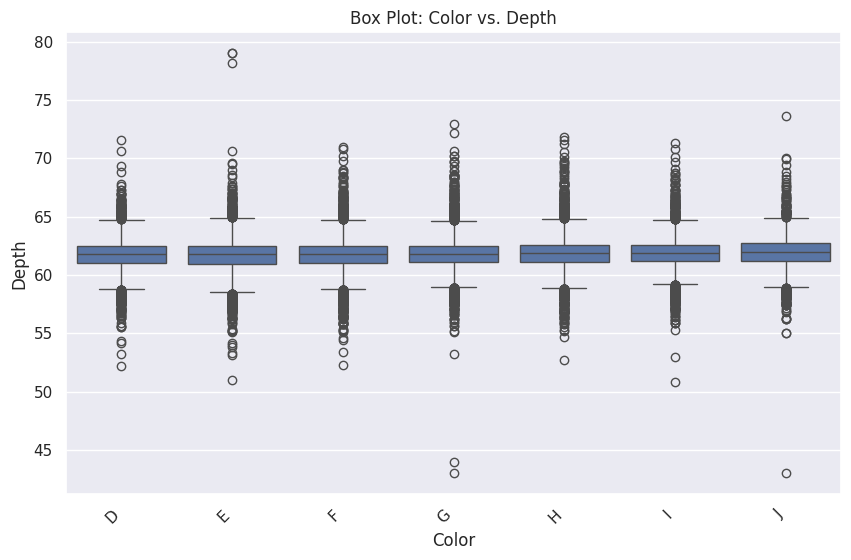

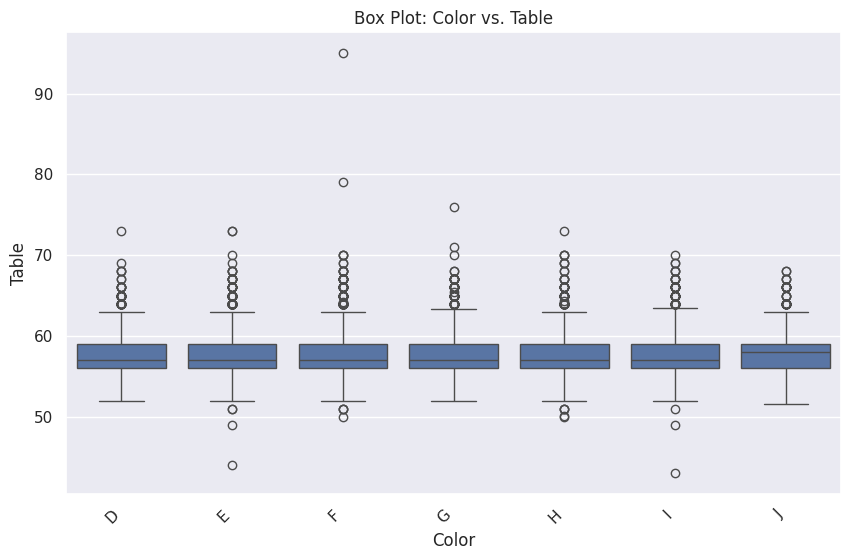

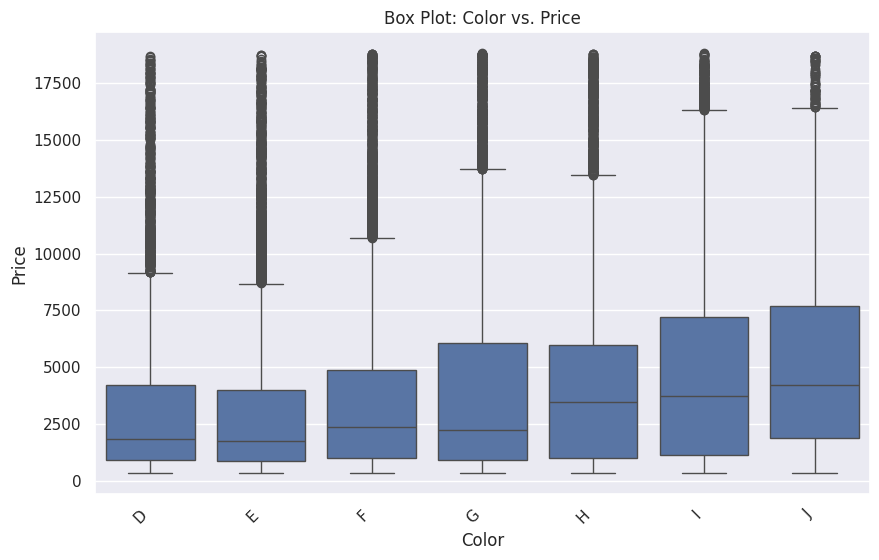

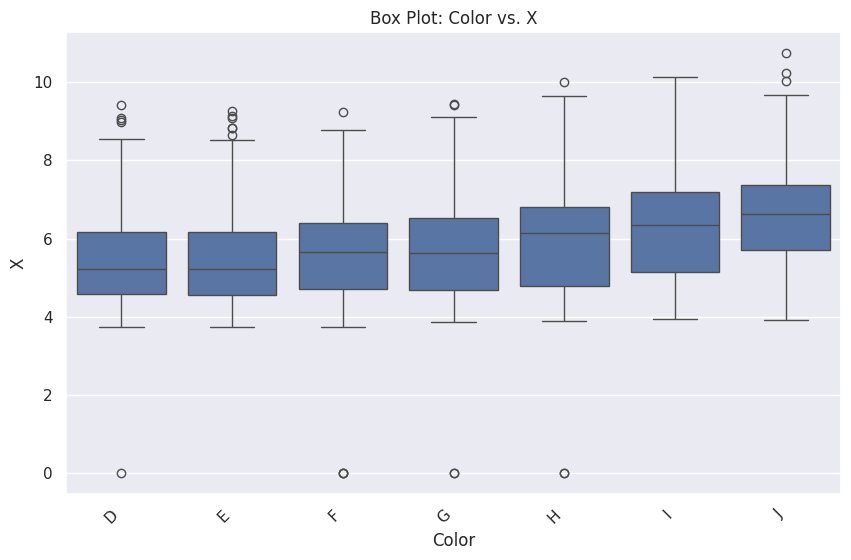

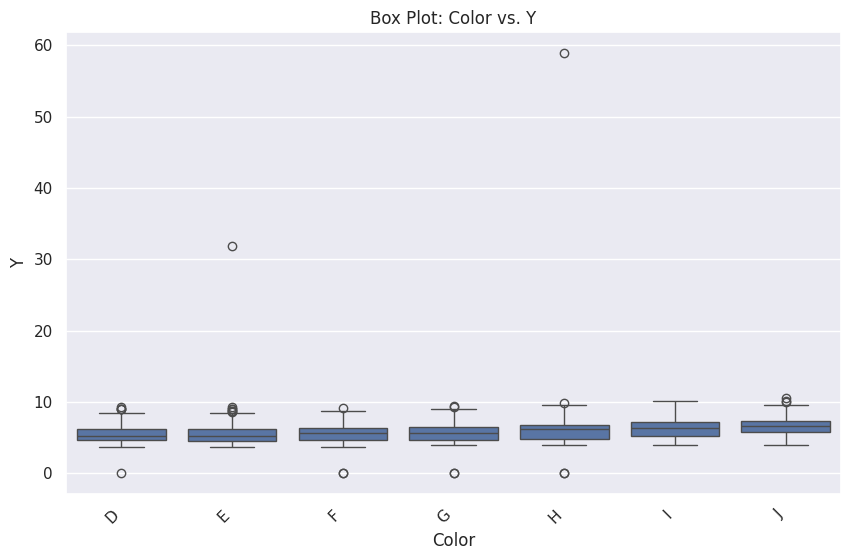

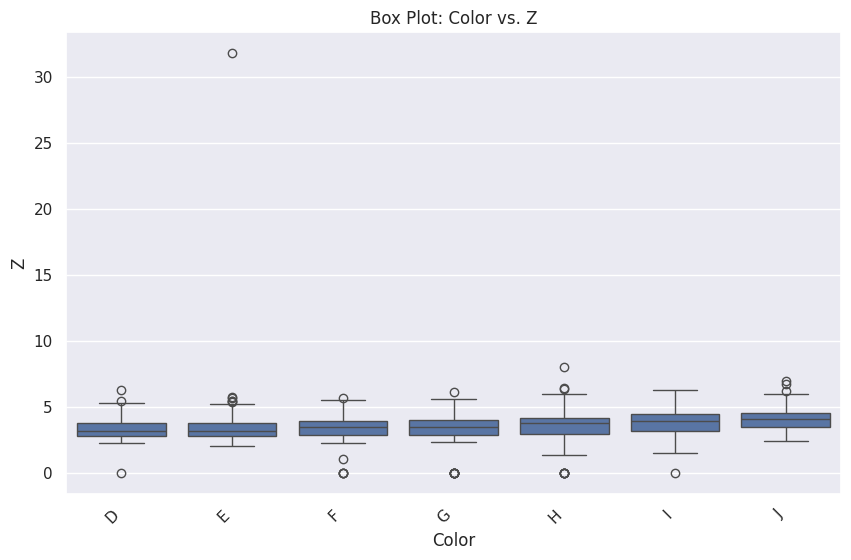

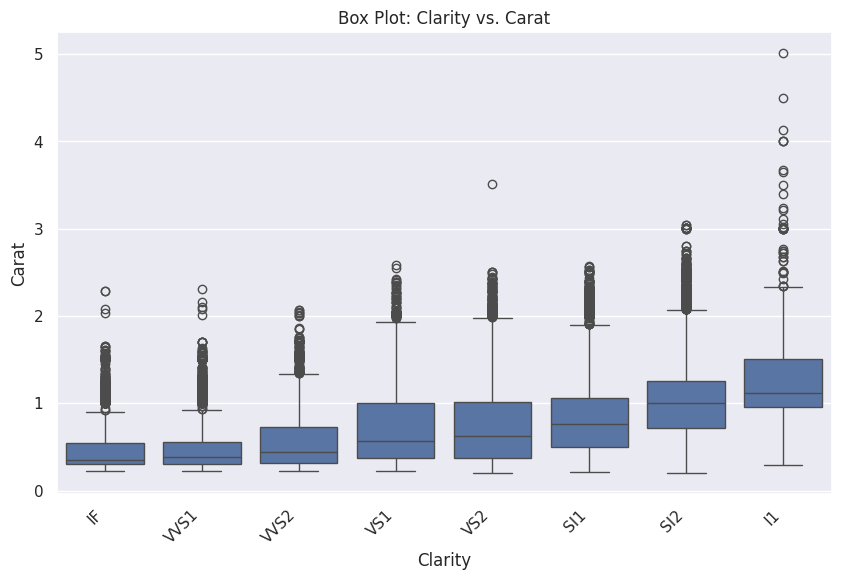

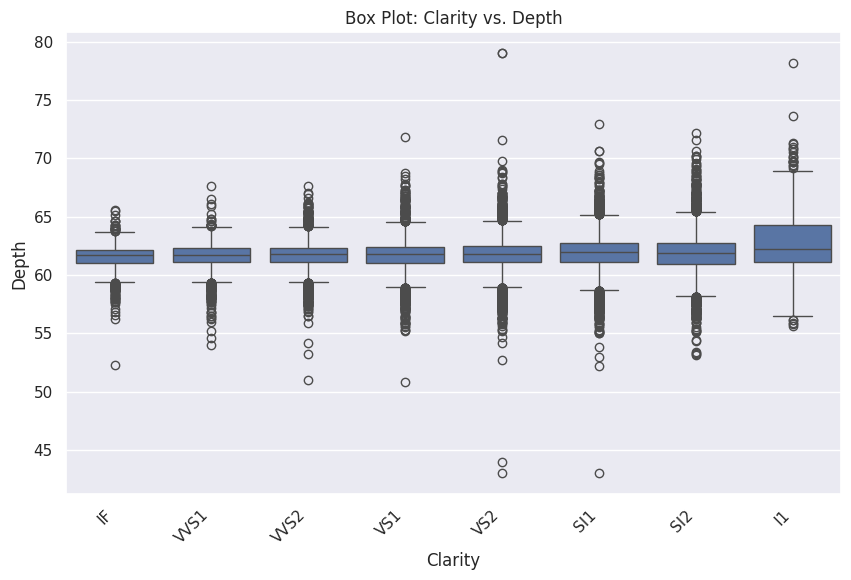

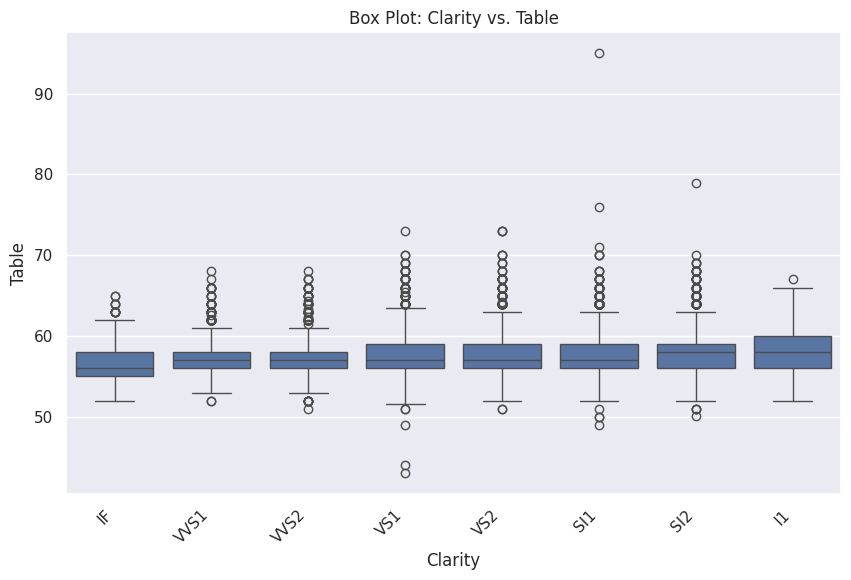

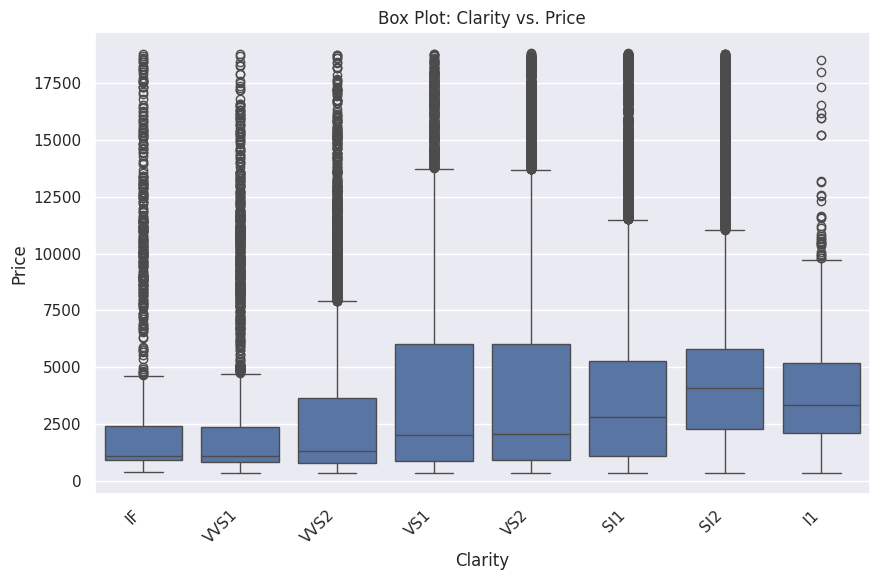

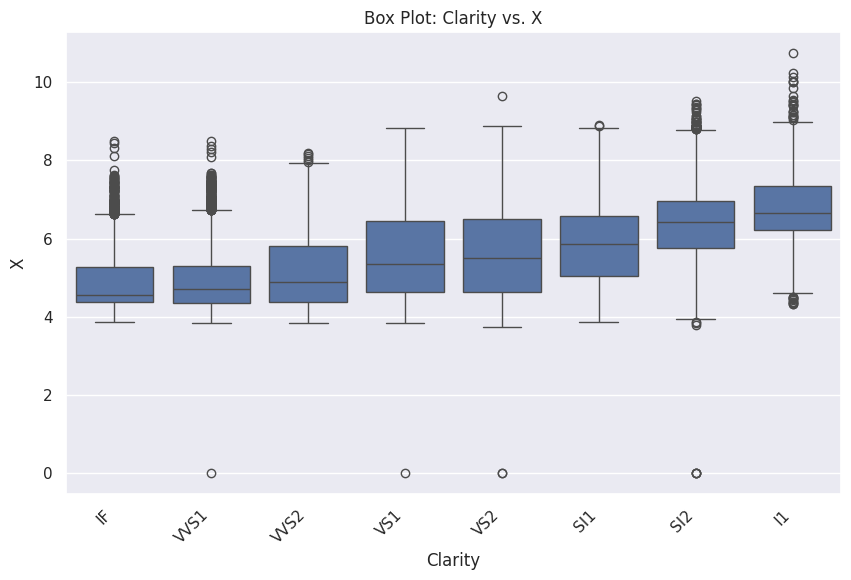

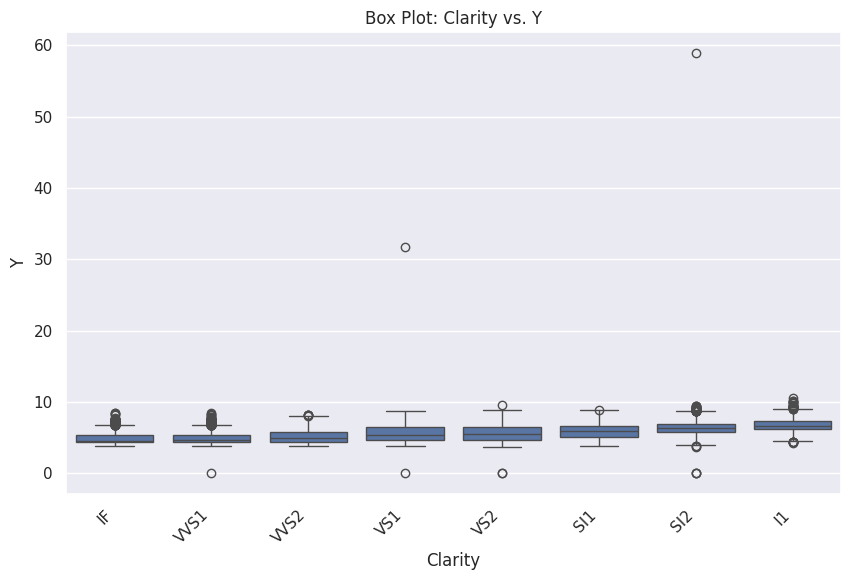

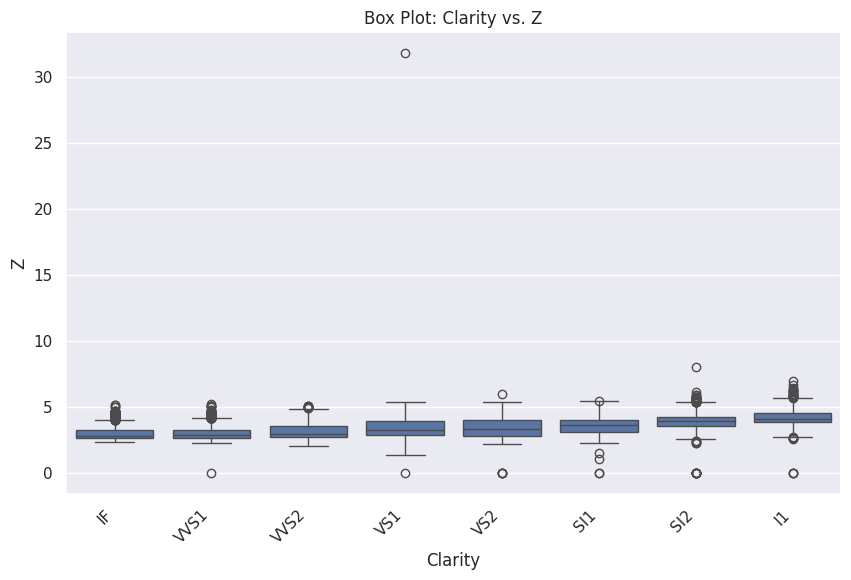

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical and continuous columns
categorical_cols = ['cut', 'color', 'clarity']
continuous_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Iterate through all combinations of categorical and continuous variables
for cat_col in categorical_cols:
    for cont_col in continuous_cols:
        plt.figure(figsize=(10, 6))  # Adjust figure size as needed
        sns.boxplot(x=cat_col, y=cont_col, data=diamonds)
        plt.title(f"Box Plot: {cat_col.capitalize()} vs. {cont_col.capitalize()}")
        plt.xlabel(cat_col.capitalize())
        plt.ylabel(cont_col.capitalize())
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
        plt.show()

### 3.4 Correlation Analysis: correlation matrix

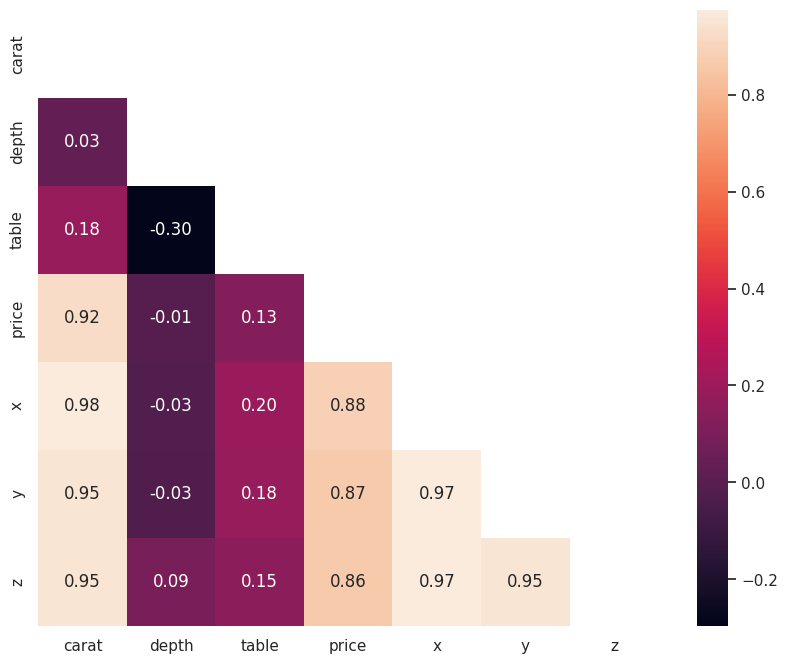

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical features
corr_mtx = diamonds.select_dtypes(include=np.number).corr()

# Create a mask to hide the upper triangle
mask = np.zeros_like(corr_mtx)
mask[np.triu_indices_from(mask)] = True

# Apply the mask to the heatmap
with sns.axes_style("white"):
    plt.figure(figsize=(10, 8))
    plot = sns.heatmap(corr_mtx, mask=mask, annot=True, fmt=".2f")
    plt.show()

From this we can see that carat,price,and (x,y,z) have strong correlation between them but depth and table have 0 to very low co-relation

## 4.0 Missing Value Analysis

In [55]:
diamonds.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


## 5.0 Outlier Analysis

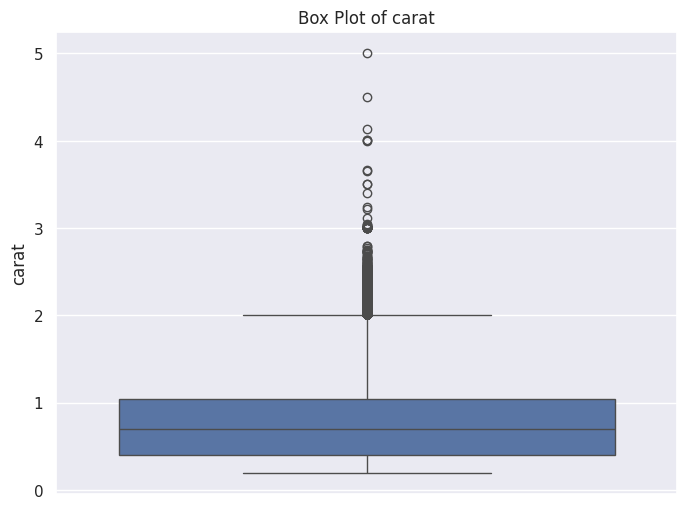

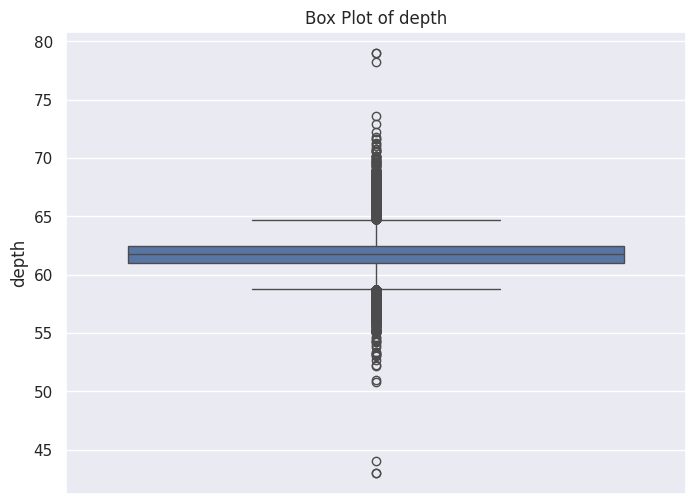

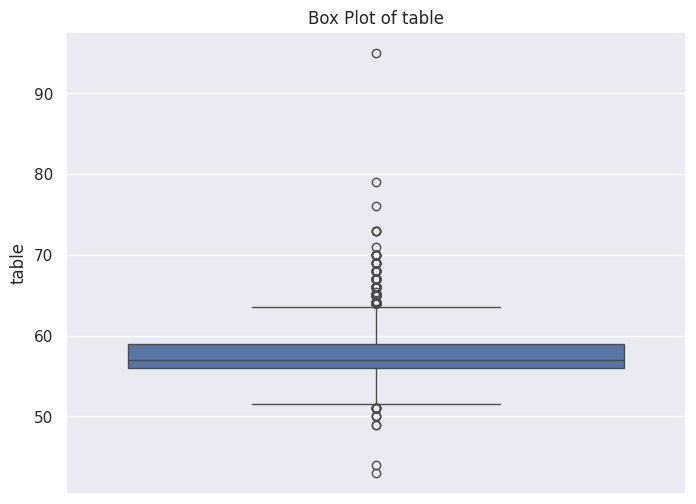

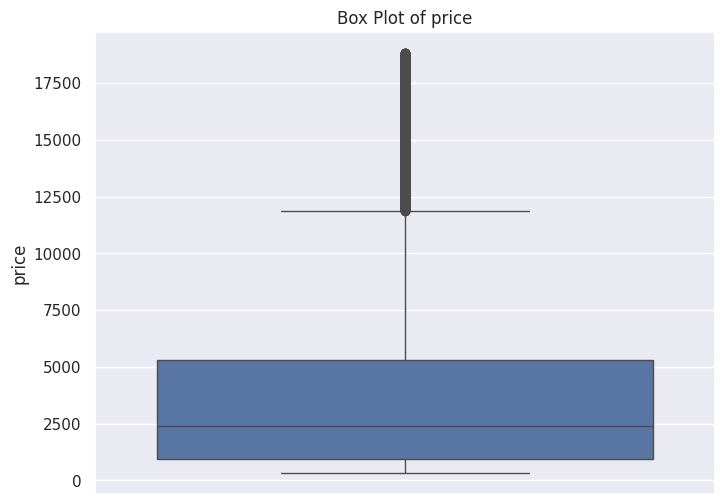

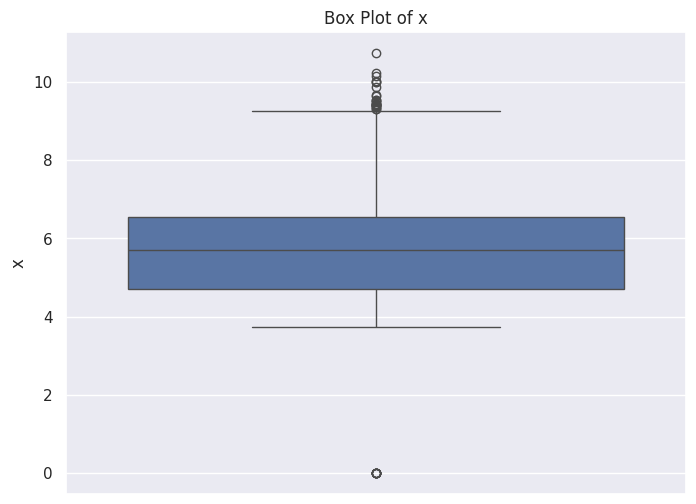

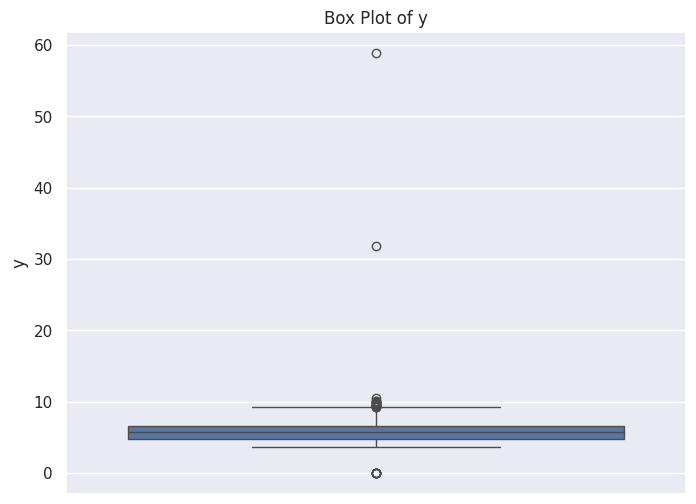

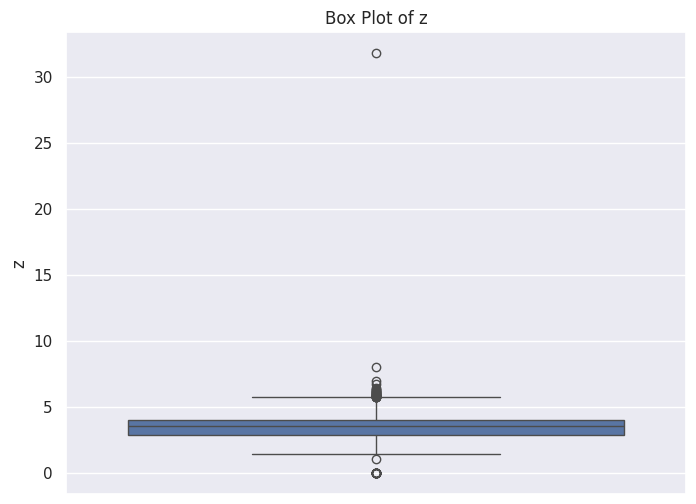

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings


%matplotlib inline
sns.set() # Apply the default seaborn theme, scaling, and color palette


warnings.filterwarnings("ignore")

diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame


def create_boxplot(df, column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.show()

#Numerical Columns:
numerical_columns = diamonds.select_dtypes(include=np.number).columns

#Create boxplots
for column in numerical_columns:
    create_boxplot(diamonds,column)

we can see price,caret and depth has the most outliers and all Quartiles for all variables are pretty evenly distributed

## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [56]:
diamonds["cut"].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610
